### Importing libraries needed for project

In [374]:
#importing libraires I will most likely need
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Load in our stroke data as a dataframe

In [375]:
stroke_data = pd.read_csv('Desktop/datasets/healthcare-dataset-stroke-data.csv')

In [376]:
pd.set_option('display.max_rows', 200)

In [377]:
#looking at the first 30 lines of our stroke data
stroke_data.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [378]:
###check columns with null values
stroke_data.columns[stroke_data.isnull().any()]

Index(['bmi'], dtype='object')

In [379]:
#luckily, only the bmi column has null values, so let's see how many null values there are to give us an idea the best way
#to deal with this problem
stroke_data['bmi'].isnull().sum(axis = 0)

201

In [380]:
#I don't need the id column
stroke_data_removed_id = stroke_data.drop('id', axis=1)

In [381]:
#number of people with vs without stroke from dataset
stroke_data_removed_id['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [382]:
#number of people with vs without heart_disease from dataset
stroke_data_removed_id['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [383]:
stroke_data_removed_id['age'].max()

82.0

In [384]:
stroke_data_removed_id['age'].min()

0.08

<AxesSubplot:xlabel='stroke', ylabel='count'>

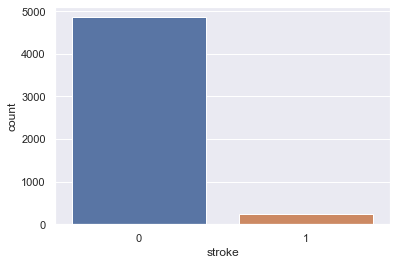

In [385]:
## check number of people with and without stroke
sns.set_theme(style="darkgrid")
sns.countplot(stroke_data_removed_id['stroke'])

In [386]:
#since we have very small percentage of people with stroke from the dataset, it won't be wise to remove rows with null
#bmi values if the stroke value is positive (1). So checking to see what the stroke value was for the NaN bmi's will
#give a better idea what next to do
check_stroke_nobmi=stroke_data_removed_id[stroke_data_removed_id['bmi'].isnull()& (stroke_data_removed_id['stroke']==1)]

In [387]:
check_stroke_nobmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [388]:
#I will drop the bmi column since all NaN instances have a stroke value of 1
cleaned_stroke_data = stroke_data_removed_id.drop(['bmi'],axis=1)

In [389]:
#look at what our data looks like now
cleaned_stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


In [390]:
cleaned_stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [391]:
cleaned_stroke_data.loc[(cleaned_stroke_data['smoking_status']=='Unknown')&(cleaned_stroke_data['stroke']==1)].describe()

,age,hypertension,heart_disease,avg_glucose_level,stroke
count,47.000000,47.000000,47.000000,47.000000,47.0
mean,65.836596,0.085106,0.170213,124.808936,1.0
std,16.236866,0.282057,0.379883,57.067115,0.0
min,1.320000,0.000000,0.000000,57.930000,1.0
25%,58.000000,0.000000,0.000000,80.065000,1.0
50%,71.000000,0.000000,0.000000,101.450000,1.0
75%,77.500000,0.000000,0.000000,179.755000,1.0
max,82.000000,1.000000,1.000000,219.910000,1.0


In [392]:
#TODO: where smoking status is unknown, replace with something else

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

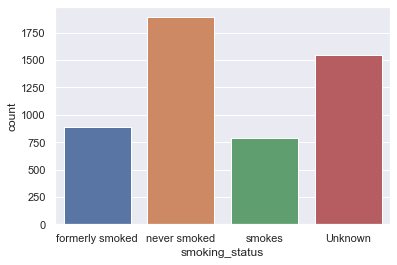

In [393]:
sns.set_theme(style="darkgrid")
sns.countplot(cleaned_stroke_data['smoking_status'])

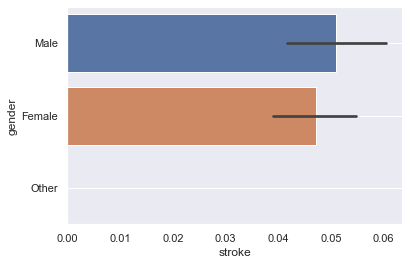

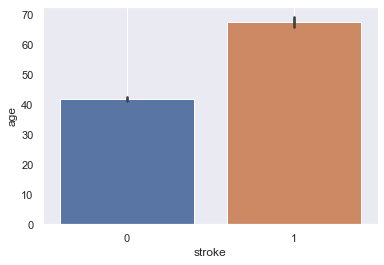

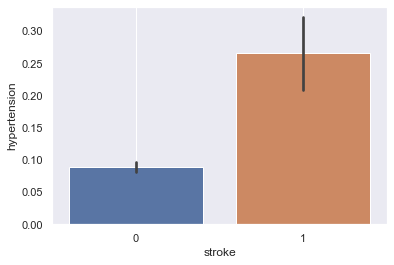

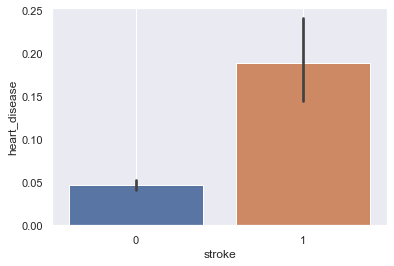

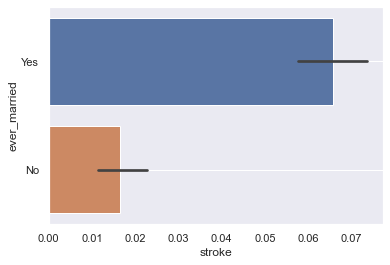

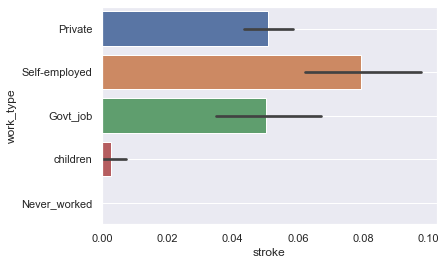

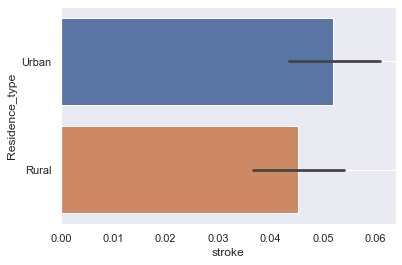

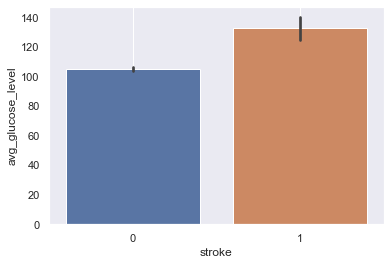

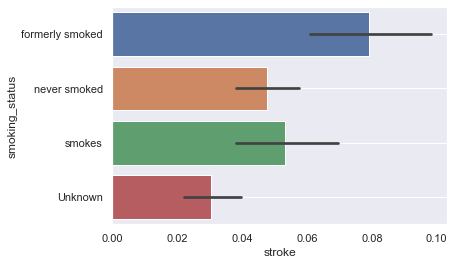

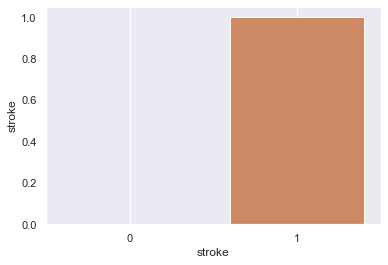

In [394]:
#see how stroke relates with the other attributes given in the data
for i, column in enumerate(cleaned_stroke_data.columns):
    sns.barplot(x='stroke', y=column, data=cleaned_stroke_data)
    plt.grid()
    plt.show()

In [395]:
#from the above, we see that stroke is slightly higher amongst males, the higher the age the more prone to stroke people 
#get,those who have suffered hypertension are more likely to stroke, those that have suffered heart disease are more 
#likely to suffer stroke, married people are more likely to suffer stroke, self-employed people are most likely to 
#suffer stroke,those with higer glucose levels are more likely to suffer stroke, those who have formely smoked are more 
#likely to suffer stroke followed by those that smoke and so on as seen from the figures above.

In [396]:
from sklearn.preprocessing import LabelEncoder

In [397]:
#using label encoding for the categorical columns with text values
le = LabelEncoder()

In [398]:
#cleaned_stroke_data['age'] = le.fit_transform(cleaned_stroke_data['stroke'])
cleaned_stroke_data['avg_glucose_level'] = le.fit_transform(cleaned_stroke_data['avg_glucose_level'])
cleaned_stroke_data['hypertension'] = le.fit_transform(cleaned_stroke_data['hypertension'])
cleaned_stroke_data['heart_disease'] =le.fit_transform(cleaned_stroke_data['heart_disease'])
cleaned_stroke_data['ever_married'] = le.fit_transform(cleaned_stroke_data['ever_married'])
cleaned_stroke_data['Residence_type'] = le.fit_transform(cleaned_stroke_data['Residence_type'])
cleaned_stroke_data['smoking_status'] =le.fit_transform(cleaned_stroke_data['smoking_status'])
cleaned_stroke_data['work_type'] =le.fit_transform(cleaned_stroke_data['work_type'])
cleaned_stroke_data['gender'] =le.fit_transform(cleaned_stroke_data['gender'])

In [399]:
cleaned_stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,1,3850,1,1
1,0,61.0,0,0,1,3,0,3588,2,1
2,1,80.0,0,1,1,2,0,2483,2,1
3,0,49.0,0,0,1,2,1,3385,3,1
4,0,79.0,1,0,1,3,0,3394,2,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,2,0
5106,0,81.0,0,0,1,3,1,3030,2,0
5107,0,35.0,0,0,1,3,0,1314,2,0
5108,1,51.0,0,0,1,2,0,3363,1,0


In [400]:
#transform the data to be on same scale using sklearn's StandardScaler()

In [401]:
from sklearn.preprocessing import StandardScaler

In [402]:
scale = StandardScaler()

In [403]:
X = cleaned_stroke_data.drop('stroke',axis=1)
y = cleaned_stroke_data['stroke']

In [404]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,1,67.0,0,1,1,2,1,3850,1
1,0,61.0,0,0,1,3,0,3588,2
2,1,80.0,0,1,1,2,0,2483,2
3,0,49.0,0,0,1,2,1,3385,3
4,0,79.0,1,0,1,3,0,3394,2
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,2
5106,0,81.0,0,0,1,3,1,3030,2
5107,0,35.0,0,0,1,3,0,1314,2
5108,1,51.0,0,0,1,2,0,3363,1


In [405]:
X = scale.fit_transform(X)

In [406]:
X

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  0.98407974,
         1.78017003, -0.35178071],
       [-0.840344  ,  0.78607007, -0.32860186, ..., -1.01617781,
         1.54302885,  0.58155233],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -1.01617781,
         0.54287232,  0.58155233],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -1.01617781,
        -0.51521182,  0.58155233],
       [ 1.18807255,  0.34379639, -0.32860186, ..., -1.01617781,
         1.33937707, -0.35178071],
       [-0.840344  ,  0.03420481, -0.32860186, ...,  0.98407974,
        -0.38849515, -1.28511375]])

In [407]:
#splitting the data into my train and test set in a stratified fashion using the stroke labels so there is a well
#distributed proportion of stroke labels in each set since there are few stroke positive samples compared to the rest of 
#the samples.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [408]:
model = LogisticRegression().fit(X_train,y_train)

In [409]:
#using the trained model on the test set
pred_y = model.predict(X_test)

In [410]:
model.score(X_train,y_train)

0.951320939334638

In [411]:
model.score(X_test,y_test)

0.9510763209393346

In [412]:
#The logistic regression model has a good accuracy score of approximately 0.95 from the training data & 0.95 
#on the test set

In [413]:
#using a confusion matrix to see the number of correctly classified samples for our test data
from sklearn.metrics import confusion_matrix

In [414]:
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[972   0]
 [ 50   0]]


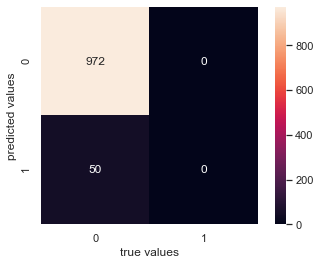

In [415]:
#using a heatmap to make the results from the confusion matrix of our logistic model more readable
sns.heatmap(cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('true values')
plt.ylabel('predicted values');

In [416]:
#from the heatmap above and from printing the result of unique classes from our predictions, we see that all samples
#were classified as non-stroke and although the model accuracy is high, it seems to always classifies all samples as
#non-stroke which is not the case in the real world. I will try other models, see how they perform in this situation 
#where we have imbalanced datasets (most of our samples don't have stroke) and also come back to tune this logisitc model
#and see how differently it performs in a case where this imbalanced data is dealt with.
print(np.unique(y_test))
print(np.unique(pred_y))

[0 1]
[0]


In [417]:
#Using a random forest classifier with 10 trees and bootstrapping enabled so wd use different combinations of features to
#build each tree to see how this perfroms on the dataset in contrast to my logistic model.
rf_clf = RandomForestClassifier(n_estimators=10, bootstrap=True, random_state=0)

In [418]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [419]:
rf_clf.score(X_train,y_train)

0.9892367906066536

In [420]:
rf_clf.score(X_test,y_test)

0.952054794520548

In [421]:
y_pred = rf_clf.predict(X_test)

In [422]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.952054794520548


In [423]:
#Unlike the logistic model, using random forest has a higher accuracy on the data and classifies some samples as also
#having stroke
print(np.unique(y_test))
print(np.unique(y_pred))

[0 1]
[0 1]


In [424]:
#using a confusion matrix to see how many of our predictions were correct on the test set using random forest
rf_cm = confusion_matrix(y_test, y_pred)
print(test_set_cm)

[[970   2]
 [ 47   3]]


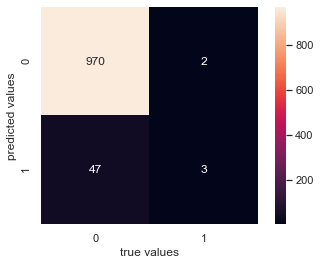

In [425]:
#using a heatmap to make the random forest's confusion matrix for the test set more readable
sns.heatmap(rf_cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('true values')
plt.ylabel('predicted values');

In [426]:
#from the above, we see that the random forest generalizes well and correctly identifies 3 stroke patients on the data it
#hasn't been exposed to before. The model also correctly identifies 970 non-stroke patients.This is considered good 
#because from the original dataset 95.1% of the samples don't have stroke.

#We also see it does very well on the 

In [427]:
###TODO: try to optimise the knn model with various classes of k to see performance before using the best on test set

In [428]:
#Using KNN

In [429]:
from sklearn.neighbors import KNeighborsClassifier

In [430]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [431]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [432]:
knn_y_pred = knn_model.predict(X_test)

In [433]:
knn_model.score(X_test,y_test)

0.9412915851272016

In [434]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

array([[959,  13],
       [ 47,   3]], dtype=int64)

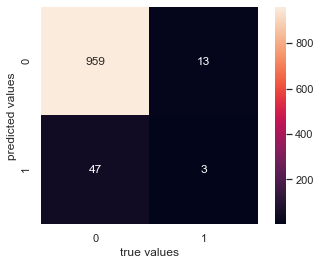

In [435]:
#using a heatmap to make the knn's confusion matrix for the test set more readable
sns.heatmap(knn_cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('true values')
plt.ylabel('predicted values');

In [436]:
#knn_model.get_params()